# ggplot2

[ggplot2](http://ggplot2.tidyverse.org/reference/) é um sistema para criar gráficos de forma declarativa, baseado em [grámaticas de gráficos](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448/ref=as_li_ss_tl?ie=UTF8&qid=1477928463&sr=8-1&keywords=the+grammar+of+graphics&linkCode=sl1&tag=ggplot2-20&linkId=f0130e557161b83fbe97ba0e9175c431). Você provê o dado, dizendo ao ggplot2 como mapeá-los a elementos estéticos, quais primitivas gráficas utilizar, e ele cuida dos detalhes técnicos.

## O que é gramática de gráficos?

A ideia básica é: independemente especificar *building blocks* do plot e combiná-los para criar qualquer tipo de gráfico. Os building blocks são:

- dados
- mapa estético
- objeto geométrico
- transformação estatística
- escalas
- sistemas de cooredenadas
- ajustes de posição
- faceting

In [6]:
# install.packages("ggplot2")
library("ggplot2")

In [2]:
set.seed(10)

X = abs(rnorm(100, 60, 500))
X[X <= 40] = 40
w = 2000
y = X * (w - rnorm(length(X), 0, 500)) + 60000

df = data.frame(area = X, preco = y)

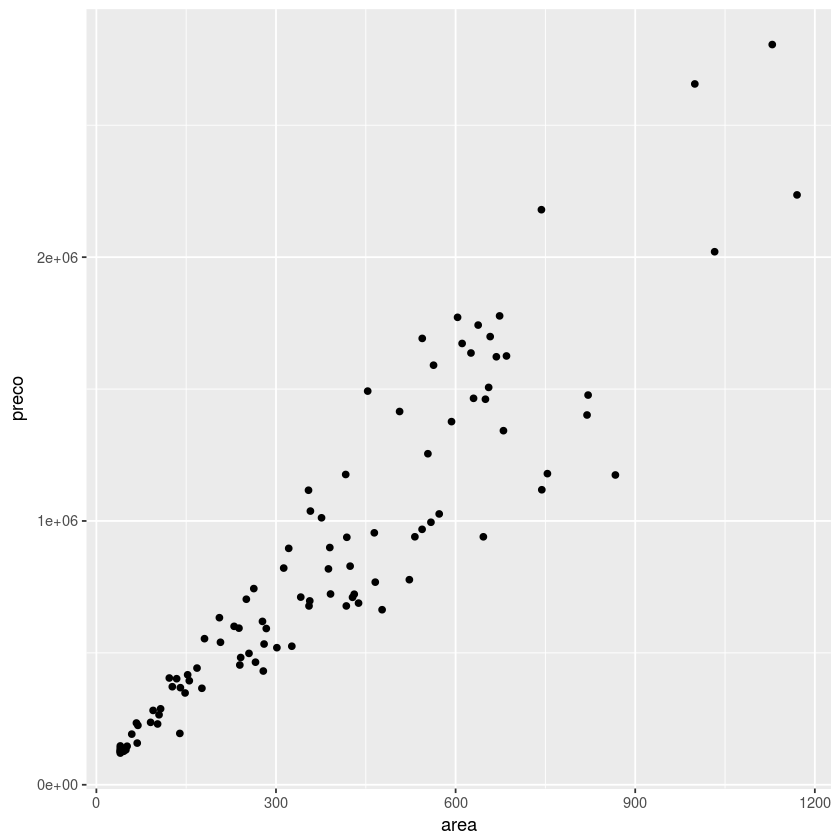

In [3]:
ggplot(df, aes(x = area, y = preco)) + 
    geom_point()

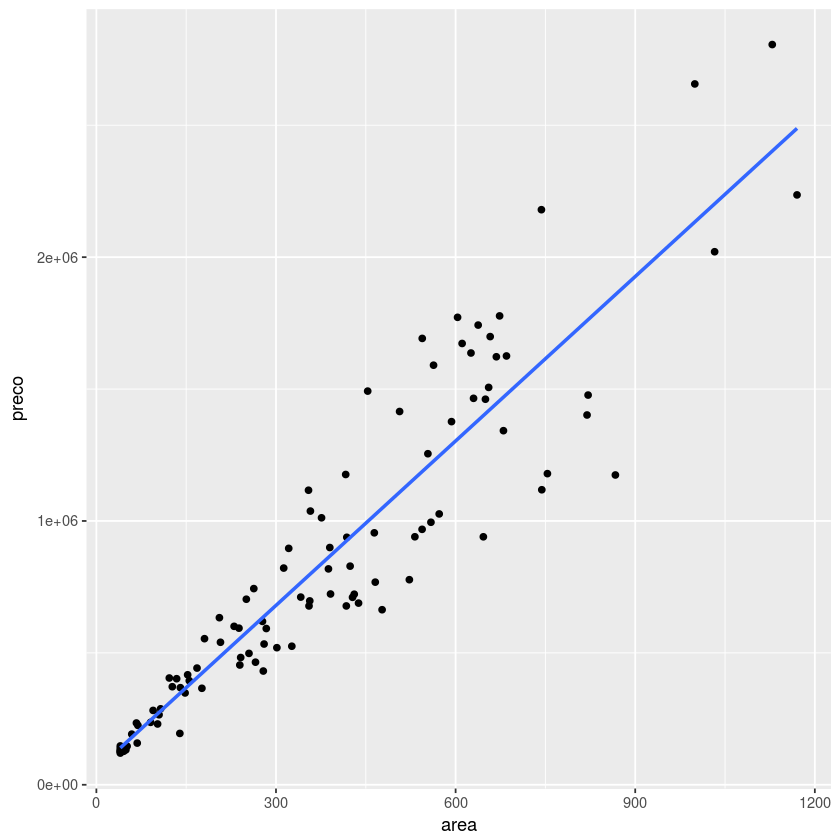

In [4]:
ggplot(df, aes(x = area, y = preco)) + 
    geom_point()  + 
    geom_smooth(method='lm', se = FALSE)

In [ ]:
mu = 5.06
varianca = 0.124
sigma = sqrt(varianca)
x = seq(mu - 3*varianca, mu + 3*varianca, length.out=100)

# plotando uma distribuição normal
df = data.frame(pdf=dnorm(x, mu, sigma), x=x)

ggplot(df, aes(x = x, y = pdf)) +
    geom_line(color="blue") 

## Objetos Geométricos e Mapas Estéticos

### Mapa Estétisco

No ggplot estéticos (a.k.a. aesthetic) significa tudo que você pode ver. Por exemplo:

- posição (i.e., nos eixos x e y)
- cor (color) 
- preenchimento (fill)
- formato dos pontos (shape)
- tipo da linha (linetype)
- tamanho (size)

In [ ]:
iris = read.csv("../aula_02/dados/iris-dataset.csv")

colnames(iris) = c("sepal_length", "sepal_width", "petal_length", "petal_width", "species")

head(iris)

In [ ]:
ggplot(iris, aes(x = sepal_length, y =sepal_width)) +
 geom_point()

In [ ]:
# adcione os seguintes aesthetic: size=petal_width, shape=species
ggplot(iris, aes(x = sepal_length, y = sepal_width, color=species)) +
 geom_point()

## Objectos Geométricos (geom)

Objetos geométricos são o que é de fato traçado. Exemplos são:

- pontos (geom_point, para gráficos de dispersão)
- linhas (geom_line, para time series, tendências, etc)
- boxplot (geom_boxplot)

Um gráfico deve ter pelo menos um geom; não quantidade máxima. Você pode adicionar geom ao seu gráfico com operador **+** .

Você pode listar os objetos geométricos disponíveis abaixo:

In [ ]:
help.search("geom_", package = "ggplot2")

In [ ]:
ggplot(iris, aes(x=sepal_length)) + 
geom_density()

In [ ]:
ggplot(iris, aes(x=sepal_length, y = sepal_width)) + 
geom_density_2d()

In [ ]:
ggplot(iris, aes(x=sepal_length, y = sepal_width, color=species)) + 
geom_density_2d()

## Boxplot

In [ ]:
ggplot(iris, aes(x=species, y=sepal_width, fill=species)) + 
geom_boxplot()

## Violin

In [ ]:
ggplot(iris, aes(x=species, y=sepal_width, fill=species)) + 
geom_violin(draw_quantiles=c(0.25, 0.5, 0.75))

## Faceting

In [ ]:
p <- ggplot(iris, aes(sepal_length, sepal_width, color=species)) + geom_density_2d()

p + facet_wrap(~ species, ncol=1)

## PairGrid

In [ ]:
# install.packages("GGally")
library("GGally")

In [ ]:
ggpairs(data=iris, columns=1:4, mapping=aes(color=species))

In [ ]:
ggpairs(data=iris, columns=1:5, mapping=aes(color=species),
       upper=list(continuous = "density"),
       lower=list(combo = "box"))

## Exercício

Quero que você faça uma análise da tragédia do Titanic, verifique quais são as características mais importantes para a morte de um indivíduo nessa tragédia. Para isso, você vai utilizar os dados que estão no arquivo **titanic.csv** na pasta **dados**. Esses dados foram retirados da plataforma Kaggle, para maiores informações sobre as colunas e seus valores acessar [aqui](https://www.kaggle.com/c/titanic/data).

In [1]:
df = read.csv("../dados/titanic.csv")
head(df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [2]:
df$Pclass.factor = factor(df$Pclass)
df$Survived.factor = factor(df$Survived)

In [3]:
str(df)

'data.frame':	891 obs. of  14 variables:
 $ PassengerId    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived       : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass         : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name           : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 416 581 ...
 $ Sex            : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age            : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp          : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch          : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket         : Factor w/ 681 levels "110152","110413",..: 525 596 662 50 473 276 86 396 345 133 ...
 $ Fare           : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin          : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked       : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 $ Pclass.factor  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Survived.factor: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 

In [4]:
summary(df)

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.


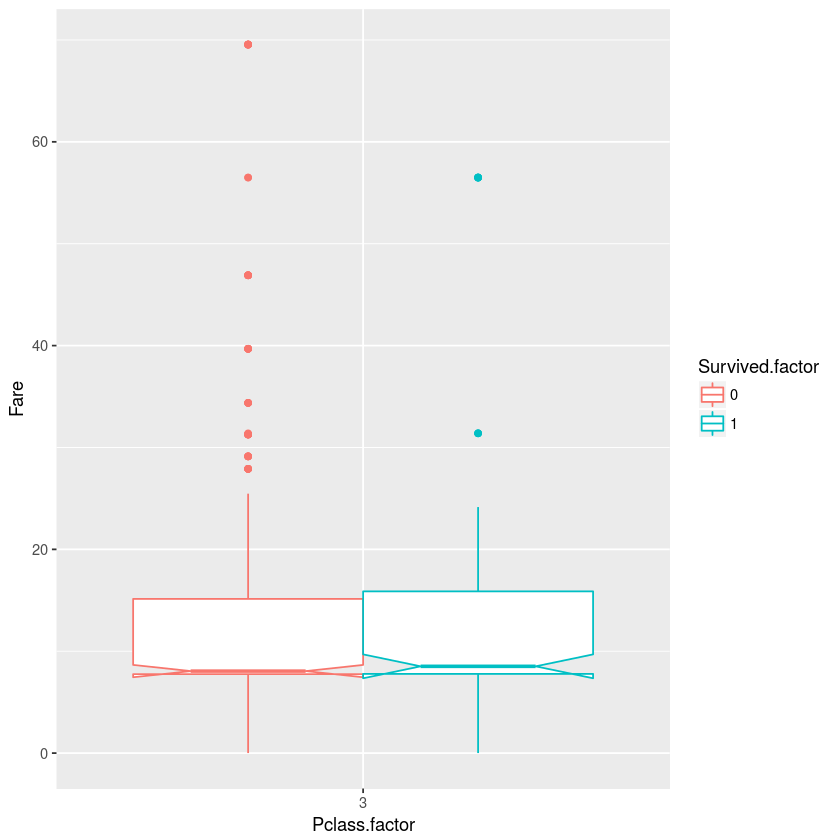

In [7]:
ggplot(df[df$Pclass.factor == "3",], aes(x = Pclass.factor, y = Fare, color=Survived.factor)) + 
geom_boxplot(notch=TRUE)

Warning message:
“Removed 177 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 177 rows containing missing values (geom_point).”

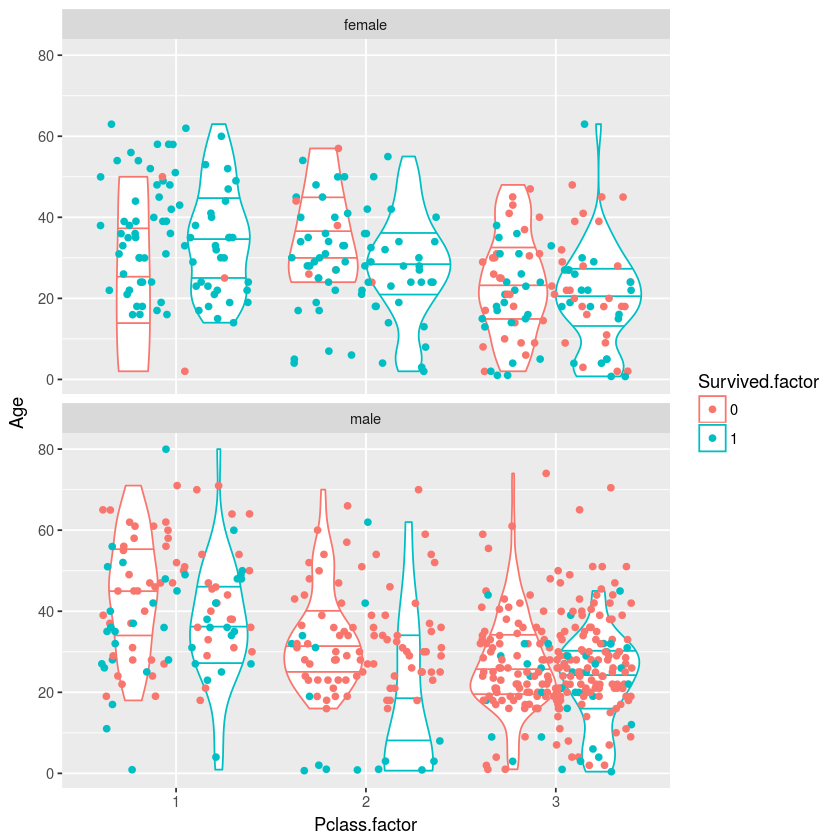

In [14]:
ggplot(df, aes(x = Pclass.factor, y = Age, color=Survived.factor)) +
geom_violin(draw_quantiles=c(0.25, 0.5, 0.75)) +
facet_wrap(~Sex, ncol=1) +
geom_jitter()

In [30]:
aggregate(Survived ~ Sex + Pclass.factor, df, function(x) {mean(x == 1)})

Sex,Pclass.factor,Survived
female,1,0.9680851
male,1,0.3688525
female,2,0.9210526
male,2,0.1574074
female,3,0.5000000
male,3,0.1354467


In [26]:
df$faixa.etaria = NA
df_limpo = df[!is.na(df$Age),]

# idade < 15 é crianca
df_limpo[df_limpo$Age < 15, "faixa.etaria"] = "crianca"
# 15 <= idade <= 45 adulto
df_limpo[df_limpo$Age >= 15 & df_limpo$Age <= 45, "faixa.etaria"] = "adulto"
# idade > 45 é idoso
df_limpo[df_limpo$Age > 45, "faixa.etaria"] = "idoso"

In [33]:
aggregate(Survived ~ Sex + faixa.etaria + Pclass.factor, df_limpo, function(x) {mean(x == 1)})

Sex,faixa.etaria,Pclass.factor,Survived
female,adulto,1,0.98412698
male,adulto,1,0.46428571
female,crianca,1,0.50000000
male,crianca,1,1.00000000
female,idoso,1,0.95000000
male,idoso,1,0.26190476
female,adulto,2,0.91228070
male,adulto,2,0.06756757
female,crianca,2,1.00000000
male,crianca,2,1.00000000


In [34]:
aggregate(Survived ~ Sex + faixa.etaria + Pclass.factor, df_limpo, function(x) {length(x == 1)})

Sex,faixa.etaria,Pclass.factor,Survived
female,adulto,1,63
male,adulto,1,56
female,crianca,1,2
male,crianca,1,3
female,idoso,1,20
male,idoso,1,42
female,adulto,2,57
male,adulto,2,74
female,crianca,2,10
male,crianca,2,9


In [37]:
aggregate(Survived ~ Pclass.factor, df_limpo, function(x) {mean(x == 0)})

Pclass.factor,Survived
1,0.3440860
2,0.5202312
3,0.7605634
